<a href="https://colab.research.google.com/github/makkimaki/reinforcement-learning-udemy/blob/main/22_FrozenLake_Value_Iteration_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 価値の評価をする


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gymnasium as gym

In [2]:
def value_iteration(env, gamma=0.99, theta=1e-6):
    nS = env.observation_space.n
    nA = env.action_space.n
    V = np.zeros(nS)
    P = env.unwrapped.P
    while True:
        delta  = 0
        for s in range(nS):
            v = V[s]
            q_values = np.zeros(nA) # 行動価値関数
            for a in range(nA):
                for prob, next_state, reward, done in P[s][a]:
                    q_values[a] += prob * (reward + gamma * V[next_state])
            V[s] = np.max(q_values) # value iterationの特徴。最大値を取る部分。
            delta = max(delta, np.abs(v - V[s]))
        if delta < theta:
            break
    # 上ではベル満載的方程式を解いた。最適なポリシーをとる価値関数がわかったので、
    # greedy化を行って、最適なpolicyを解きにいく
    policy = np.zeros([nS, nA])
    for s in range(nS):
        q_values = np.zeros(nA)
        for a in range(nA):
            for prob, next_state, reward, done in P[s][a]:
                q_values[a] += prob * (reward + gamma * V[next_state]) # 最適なポリシーにおけるVはすでに上で求まってる。そのもとでqを出す
        best_action = np.argmax(q_values)
        policy[s, best_action] = 1.0 # 100%、このアクションを取るようにpolicyを更新する
    return policy, V

In [3]:
def policy_evaluation(env, policy, gamma=0.99, theta=1e-6):
    """
    Args:
        env:
        policy:
        gamma:割引率
        theta: 収束を判定する閾値
    """
    nS = env.observation_space.n # 今回は４*４＝16マスがこれ
    V = np.zeros(nS)
    P = env.unwrapped.P

    while True:
        delta = 0
        for s in range(nS):
            v = 0
            for a, action_prob in enumerate(policy[s]): # action_prob = piのこと
                for prob, next_state, reward, done in P[s][a]:
                    v += action_prob * prob * (reward + gamma * V[next_state]) # 期待値の計算
            delta = max(delta, np.abs(v - V[s]))
            V[s] = v
        if delta < theta:
            break
    return V

In [4]:
def policy_improvement(env, V, gamma=0.99):
    nS = env.observation_space.n
    nA = env.action_space.n
    policy = np.zeros([nS, nA])
    P = env.unwrapped.P
    for s in range(nS):
        q_values = np.zeros(nA)
        for a in range(nA):
            for prob, next_state, reward, done in P[s][a]:
                q_values[a] += prob * (reward + gamma * V[next_state])
        best_action = np.argmax(q_values)
        policy[s, best_action] = 1.0 # 100%、このアクションを取るようにpolicyを更新する
    return policy

In [5]:
def policy_iteration(env, gamma=0.99, theta=1e-6):
    nS = env.observation_space.n
    nA = env.action_space.n
    policy = np.ones([nS, nA]) / nA   # ランダムにポリシー設定
    while True:
        V = policy_evaluation(env, policy, gamma=gamma, theta=theta)
        new_policy = policy_improvement(env, V, gamma=gamma)
        if (new_policy == policy).all():  # ２つのnp arrayが等しいか確認
            break
        policy = new_policy
    return policy, V

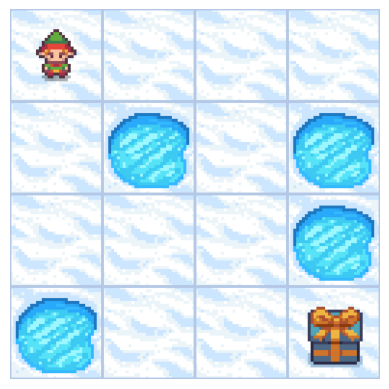

In [6]:
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")
state, info = env.reset()
frame = env.render()
plt.imshow(frame)
plt.axis("off")
plt.show()

In [7]:
# pi_star, V_pi_star = policy_iteration(env, gamma=0.99, theta=1e-6)
pi_star, V_pi_star = value_iteration(env, gamma=0.99, theta=1e-6)

In [8]:
# 各状態sに対する最適な行動
pi_star

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [9]:
# 価値関数
V_pi_star

array([0.95099005, 0.96059601, 0.970299  , 0.96059601, 0.96059601,
       0.        , 0.9801    , 0.        , 0.970299  , 0.9801    ,
       0.99      , 0.        , 0.        , 0.99      , 1.        ,
       0.        ])

<Axes: >

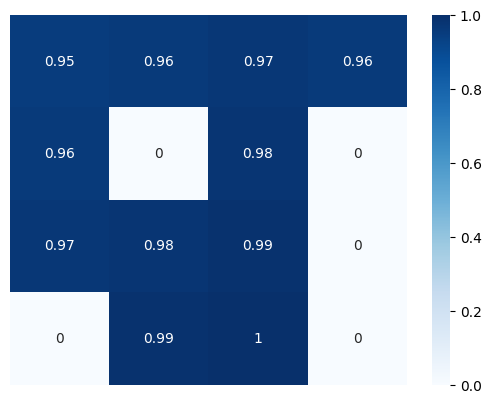

In [10]:
# マップに対する価値関数が表示される
# ゴールでは0となってる！
# ゴール目前は価値が高いことが見える
fig, ax = plt.subplots()
sns.heatmap(
    V_pi_star.reshape(4, 4),
    ax=ax,
    cmap="Blues",
    linecolor="black",
    xticklabels=[],
    yticklabels=[],
    annot=True
)